In [12]:
import itertools
import pandas as pd
import numpy as np
import functools
import pickle
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler # standardization
from sklearn.model_selection import train_test_split # Split dataset
from sklearn.metrics import accuracy_score, f1_score, make_scorer # Accuracy measurements
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

In [13]:
df = pd.read_csv('wine.csv', sep=';')

In [14]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1998, stratify=y)

In [15]:
def FindSupportingObjectsIndices(test_row, train_row, X_train):
    intersection = pd.Series([(min(test_row[col], train_row[col]), max(test_row[col], train_row[col]))
                                 for col in X_train.columns], index=X_train.columns)
    condition_list = [(v[0] <= X_train[col]) & (X_train[col] <= v[1]) for col, v in intersection.items()]
    mask = functools.reduce(lambda x, y: x & y, condition_list)
    return X_train.loc[mask].index
    
    
def Vote(row, X_train, y_train):
    all_labels = list(y_train.unique())
    votes = {label:0 for label in all_labels}
    for ind in X_train.index:
        supporting_objects_indices = FindSupportingObjectsIndices(row, X_train.loc[ind], X_train)
        if len(supporting_objects_indices) == 1:
            continue
        labels = list(y_train.loc[supporting_objects_indices].unique())
        if len(labels) != 1:
            continue
        votes[labels[0]] += 1
    return votes
        

def Predict(X_train, y_train, X_test, y_test):
    val_counts = y_train.value_counts().to_dict()
    min_count = min(val_counts.values())
    coefficients = {k : min_count / val_counts[k] for k, v in val_counts.items()}
    y_pred = y_test.copy()
    labels = y_train.unique()
    for ind in X_test.index:
        votes = Vote(X_test.loc[ind], X_train, y_train)
        print(votes)
        votes = {k : v * coefficients[k]  for k, v in votes.items()}        
        print(votes)
        print("should be: " + y_test.loc[ind], end='')
        max_score = -1
        max_label = 'bad'
        for label in labels:
            if votes.get(label, -1) > max_score:
                max_score = votes.get(label, -1)
                max_label = label
        y_pred.loc[ind] = max_label
        print(" turned to be: " + max_label + "\n")
    return y_pred

In [16]:
pred = Predict(X_train, y_train, X_test, y_test)

{'good': 296, 'excellent': 45, 'bad': 14}
{'good': 18.23696682464455, 'excellent': 16.52542372881356, 'bad': 14.0}
should be: good turned to be: good

{'good': 278, 'excellent': 44, 'bad': 16}
{'good': 17.127962085308056, 'excellent': 16.15819209039548, 'bad': 16.0}
should be: good turned to be: good

{'good': 294, 'excellent': 49, 'bad': 12}
{'good': 18.113744075829384, 'excellent': 17.994350282485875, 'bad': 12.0}
should be: good turned to be: good

{'good': 323, 'excellent': 43, 'bad': 16}
{'good': 19.900473933649288, 'excellent': 15.790960451977401, 'bad': 16.0}
should be: good turned to be: good

{'good': 298, 'excellent': 44, 'bad': 16}
{'good': 18.360189573459714, 'excellent': 16.15819209039548, 'bad': 16.0}
should be: good turned to be: good

{'good': 1051, 'excellent': 0, 'bad': 0}
{'good': 64.75355450236967, 'excellent': 0.0, 'bad': 0.0}
should be: good turned to be: good

{'good': 273, 'excellent': 44, 'bad': 16}
{'good': 16.819905213270143, 'excellent': 16.15819209039548, '

{'good': 315, 'excellent': 47, 'bad': 15}
{'good': 19.407582938388625, 'excellent': 17.259887005649716, 'bad': 15.0}
should be: good turned to be: good

{'good': 279, 'excellent': 45, 'bad': 16}
{'good': 17.18957345971564, 'excellent': 16.52542372881356, 'bad': 16.0}
should be: good turned to be: good

{'good': 364, 'excellent': 49, 'bad': 14}
{'good': 22.42654028436019, 'excellent': 17.994350282485875, 'bad': 14.0}
should be: good turned to be: good

{'good': 312, 'excellent': 47, 'bad': 14}
{'good': 19.222748815165875, 'excellent': 17.259887005649716, 'bad': 14.0}
should be: good turned to be: good

{'good': 293, 'excellent': 43, 'bad': 14}
{'good': 18.0521327014218, 'excellent': 15.790960451977401, 'bad': 14.0}
should be: good turned to be: good

{'good': 301, 'excellent': 46, 'bad': 14}
{'good': 18.545023696682463, 'excellent': 16.89265536723164, 'bad': 14.0}
should be: good turned to be: good

{'good': 303, 'excellent': 45, 'bad': 14}
{'good': 18.66824644549763, 'excellent': 16.52

{'good': 1049, 'excellent': 0, 'bad': 0}
{'good': 64.6303317535545, 'excellent': 0.0, 'bad': 0.0}
should be: good turned to be: good

{'good': 1041, 'excellent': 0, 'bad': 0}
{'good': 64.13744075829383, 'excellent': 0.0, 'bad': 0.0}
should be: good turned to be: good

{'good': 274, 'excellent': 46, 'bad': 14}
{'good': 16.881516587677723, 'excellent': 16.89265536723164, 'bad': 14.0}
should be: excellent turned to be: excellent

{'good': 317, 'excellent': 48, 'bad': 12}
{'good': 19.53080568720379, 'excellent': 17.627118644067796, 'bad': 12.0}
should be: good turned to be: good

{'good': 287, 'excellent': 46, 'bad': 16}
{'good': 17.6824644549763, 'excellent': 16.89265536723164, 'bad': 16.0}
should be: good turned to be: good

{'good': 280, 'excellent': 45, 'bad': 14}
{'good': 17.251184834123222, 'excellent': 16.52542372881356, 'bad': 14.0}
should be: good turned to be: good

{'good': 314, 'excellent': 47, 'bad': 16}
{'good': 19.345971563981042, 'excellent': 17.259887005649716, 'bad': 16.0

{'good': 266, 'excellent': 43, 'bad': 16}
{'good': 16.38862559241706, 'excellent': 15.790960451977401, 'bad': 16.0}
should be: good turned to be: good

{'good': 284, 'excellent': 40, 'bad': 16}
{'good': 17.497630331753555, 'excellent': 14.689265536723164, 'bad': 16.0}
should be: good turned to be: good

{'good': 1040, 'excellent': 0, 'bad': 0}
{'good': 64.07582938388626, 'excellent': 0.0, 'bad': 0.0}
should be: good turned to be: good

{'good': 1049, 'excellent': 0, 'bad': 0}
{'good': 64.6303317535545, 'excellent': 0.0, 'bad': 0.0}
should be: good turned to be: good

{'good': 273, 'excellent': 39, 'bad': 10}
{'good': 16.819905213270143, 'excellent': 14.322033898305085, 'bad': 10.0}
should be: good turned to be: good

{'good': 323, 'excellent': 45, 'bad': 16}
{'good': 19.900473933649288, 'excellent': 16.52542372881356, 'bad': 16.0}
should be: good turned to be: good

{'good': 1024, 'excellent': 0, 'bad': 0}
{'good': 63.09004739336493, 'excellent': 0.0, 'bad': 0.0}
should be: good turned

{'good': 312, 'excellent': 47, 'bad': 14}
{'good': 19.222748815165875, 'excellent': 17.259887005649716, 'bad': 14.0}
should be: good turned to be: good

{'good': 0, 'excellent': 0, 'bad': 60}
{'good': 0.0, 'excellent': 0.0, 'bad': 60.0}
should be: bad turned to be: bad

{'good': 285, 'excellent': 45, 'bad': 12}
{'good': 17.55924170616114, 'excellent': 16.52542372881356, 'bad': 12.0}
should be: good turned to be: good

{'good': 337, 'excellent': 39, 'bad': 16}
{'good': 20.76303317535545, 'excellent': 14.322033898305085, 'bad': 16.0}
should be: bad turned to be: good

{'good': 298, 'excellent': 40, 'bad': 14}
{'good': 18.360189573459714, 'excellent': 14.689265536723164, 'bad': 14.0}
should be: good turned to be: good

{'good': 312, 'excellent': 46, 'bad': 16}
{'good': 19.222748815165875, 'excellent': 16.89265536723164, 'bad': 16.0}
should be: good turned to be: good

{'good': 276, 'excellent': 43, 'bad': 16}
{'good': 17.00473933649289, 'excellent': 15.790960451977401, 'bad': 16.0}
should

{'good': 262, 'excellent': 45, 'bad': 16}
{'good': 16.142180094786728, 'excellent': 16.52542372881356, 'bad': 16.0}
should be: good turned to be: excellent

{'good': 329, 'excellent': 41, 'bad': 14}
{'good': 20.270142180094787, 'excellent': 15.056497175141242, 'bad': 14.0}
should be: bad turned to be: good

{'good': 303, 'excellent': 46, 'bad': 14}
{'good': 18.66824644549763, 'excellent': 16.89265536723164, 'bad': 14.0}
should be: good turned to be: good

{'good': 292, 'excellent': 38, 'bad': 16}
{'good': 17.990521327014218, 'excellent': 13.954802259887005, 'bad': 16.0}
should be: good turned to be: good

{'good': 279, 'excellent': 44, 'bad': 16}
{'good': 17.18957345971564, 'excellent': 16.15819209039548, 'bad': 16.0}
should be: good turned to be: good

{'good': 291, 'excellent': 39, 'bad': 16}
{'good': 17.928909952606634, 'excellent': 14.322033898305085, 'bad': 16.0}
should be: good turned to be: good

{'good': 275, 'excellent': 46, 'bad': 12}
{'good': 16.943127962085306, 'excellent':

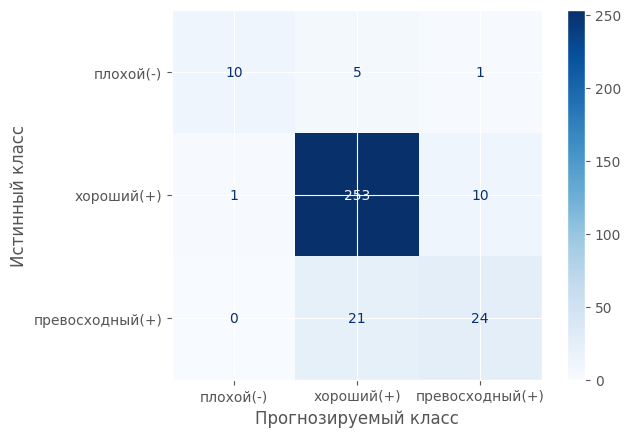

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, pred, labels=['bad', 'good', 'excellent'])

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['плохой(-)', 'хороший(+)', 'превосходный(+)'])

cm_display.plot(cmap=plt.cm.Blues)
plt.xlabel('Прогнозируемый класс')
plt.ylabel('Истинный класс')
plt.show()

In [27]:
acc_matrix = confusion_matrix/confusion_matrix.sum(axis=1)
print("accuracy -:" + str(acc_matrix[0,0]))
print("accuracy 0:" + str(acc_matrix[1,1]))
print("accuracy +:" + str(acc_matrix[2,2]))
print("average accuracy: " + str(accuracy_score(y_test, pred)))

accuracy -:0.625
accuracy 0:0.9583333333333334
accuracy +:0.5333333333333333
average accuracy: 0.8830769230769231


In [39]:
f1_matrix = f1_score(y_test, pred, average=None)
print("f1 -:" + str(f1_matrix[0]))
print("f1 0:" + str(f1_matrix[2]))
print("f1 +:" + str(f1_matrix[1]))
print("average f1:" + str(f1_score(y_test, pred, average='macro')))

f1 -:0.7407407407407406
f1 0:0.9318600368324127
f1 +:0.6
average f1:0.7575335925243843
